In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

pd.options.display.max_columns = None

In [2]:
# Importation des données
data_train = pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")
df_target_train = pd.read_csv("df_target_train.csv")
df_target_test = pd.read_csv("df_target_test.csv")
data_encoded_2016 = pd.read_csv("data_encoded_2016.csv")
data_encoded_futur = pd.read_csv("data_encoded_futur.csv")

print(f'Le fichier data_train contient {data_train.shape[0]} lignes et {data_train.shape[1]} colonnes'.format())
data_train

Le fichier data_train contient 1308 lignes et 95 colonnes


,Age_batiment,NumberofBuildings,NumberofFloors,PropertyGFATotal,Surface_taux_batiments,Surface_par_etage,TotalUseTypeNumber,harvesine_distance,Electricity_proportion,NaturalGas_proportion,Steam_proportion,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Supermarket/Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Missing,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Other - Education,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Worship Facility,Age_batiment_cat_Entre 15 et 20 ans,Age_batiment_cat_Entre 20 et 25 ans,Age_batiment_cat_Entre 25 et 30 ans,Age_batiment_cat_Entre 30 et 50 ans,Age_batiment_cat_Entre 5 et 10 ans,Age_batiment_cat_Entre 50 et 75 ans,Age_batiment_cat_Moins de 5 ans,Age_batiment_cat_Sup à 75 ans,NumberofBuildings_cat_Au dela de 6 batiments,NumberofBuildings_cat_Entre 2 et 3 batiments,NumberofBuildings_cat_Entre 4 et 5 batiments,NumberofBuildings_cat_Entre 5 et 6 batiments,NumberofFloors_cat_2 etages,NumberofFloors_cat_3 etages,NumberofFloors_cat_4 etages,NumberofFloors_cat_5 etages,NumberofFloors_cat_Entre 5 et 8 etages,NumberofFloors_cat_Entre 8 et 12 etages,NumberofFloors_cat_Sup a 12 etages
0,34,1.0,4.0,23513,0.905967,5878.250000,5,2.173226,0.506758,0.493263,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,49,1.0,1.0,32000,1.000000,32000.000000,1,5.195080,0.307608,0.692405,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,1.0,19.0,1206670,0.832716,63508.947368,4,0.886120,0.836254,0.163781,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Définition des jeux de données

In [3]:
# Définition des targets et du jeu d'entrainement

target_conso_train = df_target_train[['target_conso_train']]
target_emmi_train = df_target_train[['target_emmi_train']]

target_conso_test = df_target_test[['target_conso_test']]
target_emmi_test = df_target_test[['target_emmi_test']]

print(data_train.shape)
print(data_test.shape)
print(target_conso_train.shape)
print(target_conso_test.shape)

(1308, 95)
(327, 95)
(1308, 1)
(327, 1)


In [118]:
bilan_emmi = []
bilan_conso = []

# RamdomForest
## RamdomForest - baseline

### Cas des émissions de CO2

In [5]:
# model = RandomForestRegressor()
model = RandomForestRegressor()

cv_results = cross_validate(model, data_train, target_emmi_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_56445/3560550184.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.772434,0.009848,"(DecisionTreeRegressor(max_features='auto', ra...",0.576535,0.955014,-182007.164266,-16449.899603,-109.872673,-32.667183
1,0.780748,0.010438,"(DecisionTreeRegressor(max_features='auto', ra...",0.837001,0.957585,-99415.892185,-13617.160612,-93.406495,-30.519235
2,0.752442,0.009759,"(DecisionTreeRegressor(max_features='auto', ra...",0.360982,0.955103,-90855.612510,-19665.112553,-91.889443,-33.767495
3,0.751754,0.009780,"(DecisionTreeRegressor(max_features='auto', ra...",0.707705,0.938356,-150128.670493,-21288.382339,-71.830624,-36.931299
4,0.757202,0.009683,"(DecisionTreeRegressor(max_features='auto', ra...",0.769280,0.957277,-45074.389447,-18145.966090,-76.014162,-34.656642
Mean,0.762916,0.009902,NaN,0.650300,0.952667,-113496.345780,-17833.304239,-88.602679,-33.708371


In [6]:
# Test de l'influence du standardScaler

# model = StandardScaler + RandomForestRegressor()
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), RandomForestRegressor())

cv_results = cross_validate(model, data_train, target_emmi_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_56445/760866992.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.783511,0.009980,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.540969,0.938183,-197293.411971,-22604.578175,-119.674458,-35.506824
1,0.779215,0.010220,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.808613,0.946447,-116730.303493,-17192.903872,-94.984117,-31.977015
2,0.759693,0.009917,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.158807,0.958002,-119600.775470,-18395.034721,-97.837852,-32.247187
3,0.758532,0.009982,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.670791,0.952526,-169088.139036,-16395.026371,-70.844529,-34.260674
4,0.766797,0.010147,"(StandardScaler(), (DecisionTreeRegressor(max_...",0.772633,0.950290,-44419.303912,-21113.508502,-77.547531,-35.652126
Mean,0.769550,0.010049,NaN,0.590363,0.949090,-129426.386776,-19140.210328,-92.177697,-33.928765


Confirmation du non intêret de l'utilistion du StandardScaler

### Evaluation du modèle baseline RandomForest

In [7]:
# Entrainement du modèle
model_RF_base_emmi = RandomForestRegressor()
model_RF_base_emmi.fit(data_train, target_emmi_train.values.ravel())

# Réalisation des prédictions sur le jeu d'entrainement
predictions_emmi_baseline_RF_train = model_RF_base_emmi.predict(data_train)

print('r2 :', r2_score(target_emmi_train,predictions_emmi_baseline_RF_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_baseline_RF_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_baseline_RF_train)))

r2 : 0.9683886886247222
RMSE : 11981.02
MAE : 30.73


In [8]:
# Réalisation des prédictions sur le jeu de test
predictions_emmi_baseline_RF_test = model_RF_base_emmi.predict(data_test)

print('r2 :', r2_score(target_emmi_test,predictions_emmi_baseline_RF_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_baseline_RF_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_baseline_RF_test)))

r2 : 0.6082620630081375
RMSE : 37762.96
MAE : 76.55


In [119]:
# Ecriture des résultats
bilan_emmi.append(['RF - baseline' , 'Train','MAE', metrics.mean_absolute_error(target_emmi_train, predictions_emmi_baseline_RF_train)])
bilan_emmi.append(['RF - baseline' , 'Train','RMSE', metrics.mean_squared_error(target_emmi_train, predictions_emmi_baseline_RF_train)])
bilan_emmi.append(['RF - baseline' , 'Train', 'R2', r2_score(target_emmi_train,predictions_emmi_baseline_RF_train)])

bilan_emmi.append(['RF - baseline' ,  'Test','MAE', format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_baseline_RF_test))])
bilan_emmi.append(['RF - baseline' ,  'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_baseline_RF_test))])
bilan_emmi.append(['RF - baseline' ,  'Test','R2', r2_score(target_emmi_test,predictions_emmi_baseline_RF_test)])

## Recherche des features pertinentes via rfeCV

In [10]:
# Label encoder de la cible car RFECV ne fonctionne pas sur des données continues
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target_emmi_train)

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimal number of features : 83


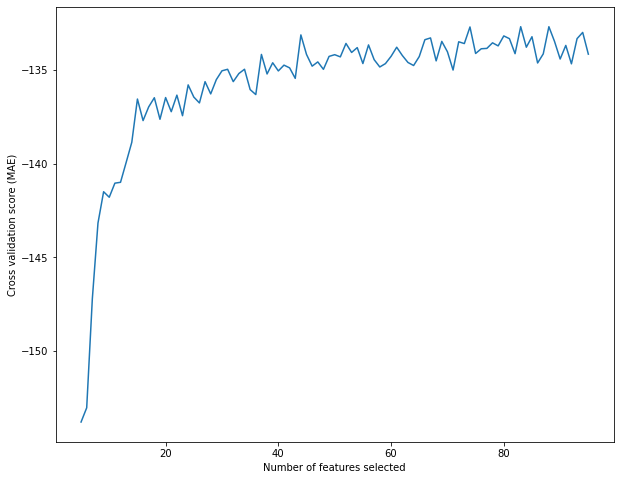

In [11]:
# Test du nombre de features
plt.rcParams["figure.figsize"] = (10,8)

kfold = KFold(n_splits=3, shuffle=True)

min_features_to_select = 5  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RandomForestRegressor(),
    step=1,
    cv=kfold,
    scoring="neg_mean_absolute_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(data_train,y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MAE)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [12]:
# Récupération des résultats
resultats_RFECV = pd.DataFrame(
    zip(data_train.columns, abs(rfecv.estimator_.feature_importances_ )),
    columns=["feature", "weight"],
).sort_values("weight",ascending=False).reset_index(drop=True)
resultats_RFECV

,feature,weight
0,NumberofFloors,0.414774
1,harvesine_distance,0.330412
2,Electricity_proportion,0.027965
3,Surface_taux_batiments,0.023090
4,TotalUseTypeNumber,0.021486
...,...,...
78,Neighborhood_SOUTHEAST,0.000281
79,PrimaryPropertyType_K-12 School,0.000235
80,LargestPropertyUseType_Other,0.000229
81,LargestPropertyUseType_Refrigerated Warehouse,0.000186


In [13]:
# Conservation des 40 features les plus importantes, apparaission d'un palier ensuite
selected_features_emmi = resultats_RFECV['feature'].iloc[:42].values
data_train_filtred_emmi = data_train[selected_features_emmi]
data_test_filtred_emmi = data_test[selected_features_emmi]

In [14]:
# Modèle avec une Feature selection
from sklearn.pipeline import make_pipeline
model = RandomForestRegressor()

cv_results = cross_validate(model, data_train_filtred_emmi, target_emmi_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_56445/1008761570.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.533406,0.010897,"(DecisionTreeRegressor(max_features='auto', ra...",0.576766,0.945656,-181907.857564,-19872.032489,-121.691466,-35.274889
1,0.526061,0.010349,"(DecisionTreeRegressor(max_features='auto', ra...",0.808259,0.950528,-116946.077382,-15882.675689,-94.681592,-30.481029
2,0.540795,0.011123,"(DecisionTreeRegressor(max_features='auto', ra...",0.716110,0.948711,-40363.443869,-22464.530745,-78.924546,-34.479021
3,0.524724,0.010087,"(DecisionTreeRegressor(max_features='auto', ra...",0.583139,0.936267,-214107.885535,-22009.806614,-77.258940,-37.043933
4,0.529676,0.010006,"(DecisionTreeRegressor(max_features='auto', ra...",0.587966,0.959628,-80496.452291,-17147.169218,-87.410988,-34.730915
Mean,0.530933,0.010492,NaN,0.654448,0.948158,-126764.343328,-19475.242951,-91.993506,-34.401958


On ne constate pas de gain significatif avec une RFE préalable.

### Test des hyperparamètres

In [15]:
model = RandomForestRegressor()

param_rfr = {'max_depth': [3,5,10, 15,20, 25],
             'min_samples_split': [2,3,4, 5,6],
             'bootstrap' : [True,False],
             'min_samples_leaf': [2,3,4,5,6],
             'max_features' : ['sqrt','log2'],  
             'n_estimators' : [30,40,50,60,70,80,90,100]}

search = GridSearchCV(model,
                           param_grid=param_rfr,
                            cv=3,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1)

In [16]:
result = search.fit(data_train_filtred_emmi, target_emmi_train.values.ravel())
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}


In [17]:
# Entrainement du modèle
model_RF_select_emmi_tuned = RandomForestRegressor(max_depth=20,min_samples_split=2,bootstrap=False,max_features='sqrt',n_estimators=50,min_samples_leaf=4)
model_RF_select_emmi_tuned.fit(data_train_filtred_emmi, target_emmi_train.values.ravel())

# Metrics sur les données d'entrainement
predictions_emmi_feature_select_RF_train = model_RF_select_emmi_tuned.predict(data_train_filtred_emmi)

print('r2 :', r2_score(target_emmi_train,predictions_emmi_feature_select_RF_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_feature_select_RF_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_feature_select_RF_train)))

r2 : 0.7925128288346301
RMSE : 78639.84
MAE : 70.77


In [18]:
# Metrics sur les données d'entrainement
predictions_emmi_feature_select_RF_test = model_RF_select_emmi_tuned.predict(data_test_filtred_emmi)

print('r2 :', r2_score(target_emmi_test,predictions_emmi_feature_select_RF_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_feature_select_RF_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_feature_select_RF_test)))

r2 : 0.5311269805709976
RMSE : 45198.67
MAE : 95.46


In [120]:
# Ecriture des résultats
bilan_emmi.append(['RF - feature select' , 'Train','MAE', metrics.mean_absolute_error(target_emmi_train, predictions_emmi_feature_select_RF_train)])
bilan_emmi.append(['RF - feature select' , 'Train','RMSE', metrics.mean_squared_error(target_emmi_train, predictions_emmi_feature_select_RF_train)])
bilan_emmi.append(['RF - feature select' , 'Train', 'R2', r2_score(target_emmi_train,predictions_emmi_feature_select_RF_train)])

bilan_emmi.append(['RF - feature select' ,  'Test','MAE', format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_feature_select_RF_test))])
bilan_emmi.append(['RF - feature select' ,  'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_feature_select_RF_test))])
bilan_emmi.append(['RF - feature select' ,  'Test','R2', r2_score(target_emmi_test,predictions_emmi_feature_select_RF_test)])

### Regard sur les features importantes pour le modèle

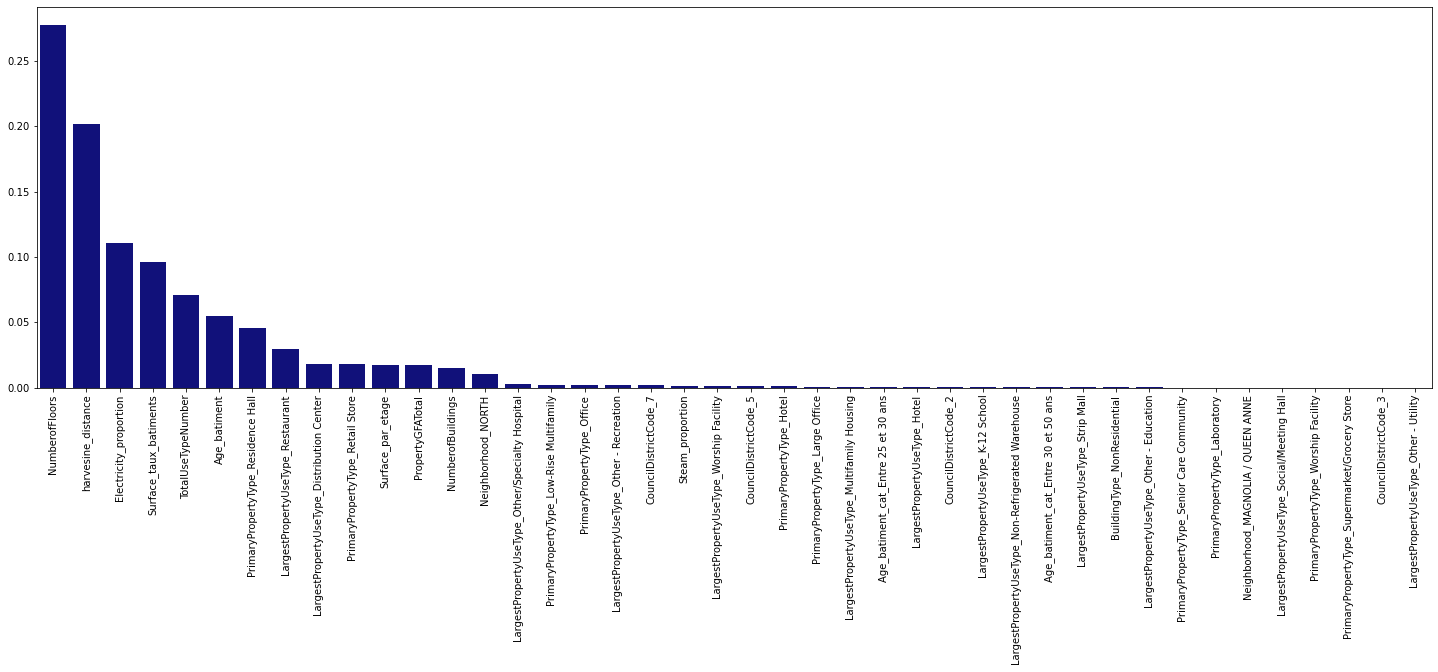

In [21]:
plt.rcParams["figure.figsize"] = (35,8)

importance_emmi = pd.Series(model_RF_select_emmi_tuned.feature_importances_,index=data_train_filtred_emmi.columns)
fig, ax = plt.subplots(figsize=(25,7))
sns.barplot(x=importance_emmi.index,y=importance_emmi.sort_values(ascending = False),color='darkblue')
_=plt.xticks(rotation=90)

### Cas de la consommation

In [22]:

model_RF_base_conso = RandomForestRegressor()

cv_results = cross_validate(model, data_train, target_conso_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_56445/986176480.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.875933,0.011418,"(DecisionTreeRegressor(max_features='auto', ra...",0.779641,0.928771,-1.159138e+14,-2.701911e+13,-4.142328e+06,-1.411150e+06
1,0.920377,0.010759,"(DecisionTreeRegressor(max_features='auto', ra...",0.537737,0.945849,-3.283686e+14,-1.808415e+13,-4.345063e+06,-1.311959e+06
2,0.872076,0.011338,"(DecisionTreeRegressor(max_features='auto', ra...",0.689897,0.947176,-5.184552e+13,-2.481429e+13,-3.313539e+06,-1.455176e+06
3,0.831187,0.010012,"(DecisionTreeRegressor(max_features='auto', ra...",0.572110,0.922690,-1.767188e+14,-3.157235e+13,-3.553343e+06,-1.522139e+06
4,0.826239,0.009698,"(DecisionTreeRegressor(max_features='auto', ra...",0.654712,0.953005,-7.706937e+13,-2.142860e+13,-3.629361e+06,-1.422699e+06
Mean,0.865163,0.010645,NaN,0.646819,0.939498,-1.499832e+14,-2.458370e+13,-3.796727e+06,-1.424625e+06


In [23]:
#Entrainement du modèle
model_RF_base_conso.fit(data_train, target_conso_train.values.ravel())

# Metrics sur les données d'entrainement
predictions_conso_baseline_RF_train = model_RF_base_conso.predict(data_train)

print('r2 - test :', r2_score(target_conso_train,predictions_conso_baseline_RF_train))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_baseline_RF_train)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_baseline_RF_train)))

r2 - test : 0.9365168726251607
RMSE - test : 26001574249814.46
MAE - test : 1385780.74


In [24]:
# Metrics sur les données de test
predictions_conso_baseline_RF_test = model_RF_base_conso.predict(data_test)

print('r2 - test :', r2_score(target_conso_test,predictions_conso_baseline_RF_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_baseline_RF_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_baseline_RF_test)))

r2 - test : 0.7211167660662338
RMSE - test : 42921479591315.78
MAE - test : 3281593.74


In [121]:
# Ecriture des résultats
bilan_conso.append(['RF - baseline' , 'Train','MAE', metrics.mean_absolute_error(target_conso_train, predictions_conso_baseline_RF_train)])
bilan_conso.append(['RF - baseline' , 'Train','RMSE', metrics.mean_squared_error(target_conso_train, predictions_conso_baseline_RF_train)])
bilan_conso.append(['RF - baseline' , 'Train', 'R2', r2_score(target_conso_train,predictions_conso_baseline_RF_train)])

bilan_conso.append(['RF - baseline' ,  'Test','MAE', format(metrics.mean_absolute_error(target_conso_test, predictions_conso_baseline_RF_test))])
bilan_conso.append(['RF - baseline' ,  'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, predictions_conso_baseline_RF_test))])
bilan_conso.append(['RF - baseline' ,  'Test','R2', r2_score(target_conso_test,predictions_conso_baseline_RF_test)])

## Recherche des features pertinentes via rfeCV

In [26]:
# Label encoder de la cible car RFECV ne fonctionne pas sur des données continues
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(target_conso_train)

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimal number of features : 76


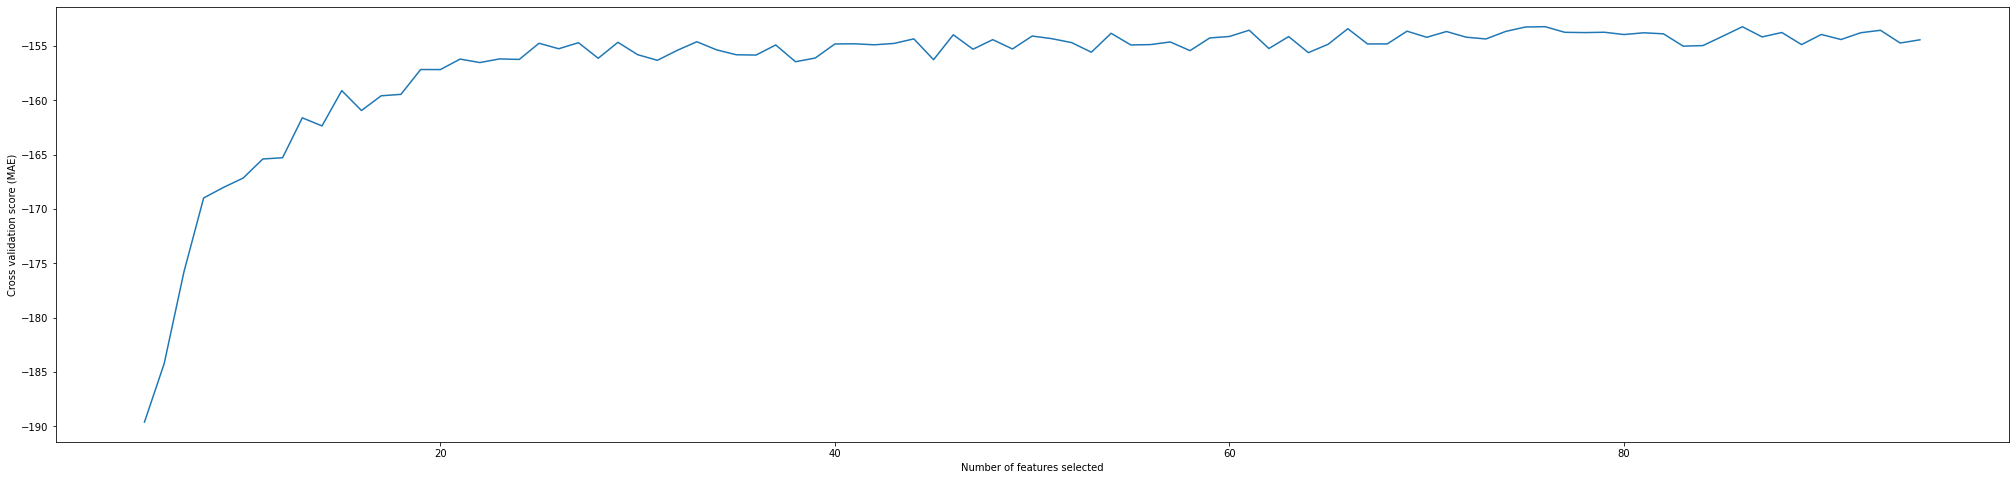

In [28]:
# Test du nombre de features
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True)

min_features_to_select = 5  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RandomForestRegressor(),
    step=1,
    cv=kfold,
    scoring="neg_mean_absolute_error",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(data_train,y1)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MAE)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [29]:
# Récupération des résultats
resultats_RFECV = pd.DataFrame(
    zip(data_train.columns, abs(rfecv.estimator_.feature_importances_ )),
    columns=["feature", "weight"],
).sort_values("weight",ascending=False).reset_index(drop=True)
resultats_RFECV

,feature,weight
0,NumberofFloors,0.614352
1,harvesine_distance,0.034411
2,Age_batiment,0.031635
3,Surface_taux_batiments,0.031331
4,TotalUseTypeNumber,0.030066
...,...,...
71,Neighborhood_LAKE UNION,0.000574
72,PrimaryPropertyType_Office,0.000558
73,LargestPropertyUseType_Multifamily Housing,0.000556
74,Neighborhood_DELRIDGE,0.000537


In [30]:
# Conservation des 38 features les plus importantes, apparition d'un palier ensuite
selected_features_conso = resultats_RFECV['feature'].iloc[:38].values
data_train_filtred_conso = data_train[selected_features_conso]
data_test_filtred_conso = data_test[selected_features_conso]

In [31]:
# Modèle avec une Feature selection
model_RF_select_conso = RandomForestRegressor()

cv_results = cross_validate(model_RF_select_conso, data_train_filtred_conso, target_conso_train.values.ravel(), cv=5,scoring=(['r2','neg_mean_squared_error','neg_mean_absolute_error']),return_train_score=True,return_estimator=True)
cv_results=pd.DataFrame(cv_results)
cv_results.loc['Mean'] = cv_results.mean()
cv_results

/tmp/ipykernel_56445/84843057.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results.loc['Mean'] = cv_results.mean()


,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.536571,0.010177,"(DecisionTreeRegressor(max_features='auto', ra...",0.727117,0.937568,-1.435427e+14,-2.368193e+13,-4.668620e+06,-1.523956e+06
1,0.503523,0.010842,"(DecisionTreeRegressor(max_features='auto', ra...",0.547066,0.962351,-3.217420e+14,-1.257322e+13,-4.570152e+06,-1.299488e+06
2,0.520882,0.010231,"(DecisionTreeRegressor(max_features='auto', ra...",0.716545,0.951405,-4.739025e+13,-2.282780e+13,-3.458311e+06,-1.580277e+06
3,0.498652,0.009957,"(DecisionTreeRegressor(max_features='auto', ra...",0.566620,0.943315,-1.789862e+14,-2.314938e+13,-3.804760e+06,-1.566246e+06
4,0.484977,0.009990,"(DecisionTreeRegressor(max_features='auto', ra...",0.610367,0.962905,-8.696748e+13,-1.691445e+13,-3.833892e+06,-1.513362e+06
Mean,0.508921,0.010240,NaN,0.633543,0.951509,-1.557257e+14,-1.982936e+13,-4.067147e+06,-1.496666e+06


On ne constate pas de gain particulier en terme de temps de calcul avec une RFE préalable.

### Test des hyperparamètres

In [32]:
model_RF_select_conso = RandomForestRegressor()

param_rfr = {'max_depth': [3,5,10, 15],
             'min_samples_split': [3,4, 5,6,7],
             'bootstrap' : [True,False],
             'min_samples_leaf': [3,4,5,6,7],
             'max_features' : ['sqrt','log2'],  
             'n_estimators' : [30,40,50,60,70,80,90,100]}

search = GridSearchCV(model_RF_select_conso,
                           param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1)

In [33]:
result = search.fit(data_train_filtred_conso, target_conso_train.values.ravel())
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [34]:
# Entrainement du modèle
model_RF_select_conso_tuned = RandomForestRegressor(bootstrap = False,max_depth=15,max_features='sqrt',n_estimators=80,min_samples_split=3,min_samples_leaf=3)
model_RF_select_conso_tuned.fit(data_train_filtred_conso, target_conso_train.values.ravel())

# Metrics sur les données d'entrainement
predictions_conso_select_RF_train = model_RF_select_conso_tuned.predict(data_train_filtred_conso)

print('r2 - test :', r2_score(target_conso_train,predictions_conso_select_RF_train))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_select_RF_train)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_select_RF_train)))

r2 - test : 0.8540765553160863
RMSE - test : 59767680620619.13
MAE - test : 2473287.54


In [35]:
# Metrics sur les données de test
predictions_conso_select_RF_test = model_RF_select_conso_tuned.predict(data_test_filtred_conso)

print('r2 :', r2_score(target_conso_test,predictions_conso_select_RF_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_select_RF_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_select_RF_test)))

r2 : 0.6634533719694744
RMSE : 51796155053082.20
MAE : 3683319.91


In [122]:
# Ecriture des résultats
bilan_conso.append(['RF - feature select' , 'Train','MAE', metrics.mean_absolute_error(target_conso_train, predictions_conso_select_RF_train)])
bilan_conso.append(['RF - feature select' , 'Train','RMSE', metrics.mean_squared_error(target_conso_train, predictions_conso_select_RF_train)])
bilan_conso.append(['RF - feature select' , 'Train', 'R2', r2_score(target_conso_train,predictions_conso_select_RF_train)])

bilan_conso.append(['RF - feature select' ,  'Test','MAE', format(metrics.mean_absolute_error(target_conso_test, predictions_conso_select_RF_test))])
bilan_conso.append(['RF - feature select' ,  'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, predictions_conso_select_RF_test))])
bilan_conso.append(['RF - feature select' ,  'Test','R2', r2_score(target_conso_test,predictions_conso_select_RF_test)])

### Regard sur les features importantes pour le modèle

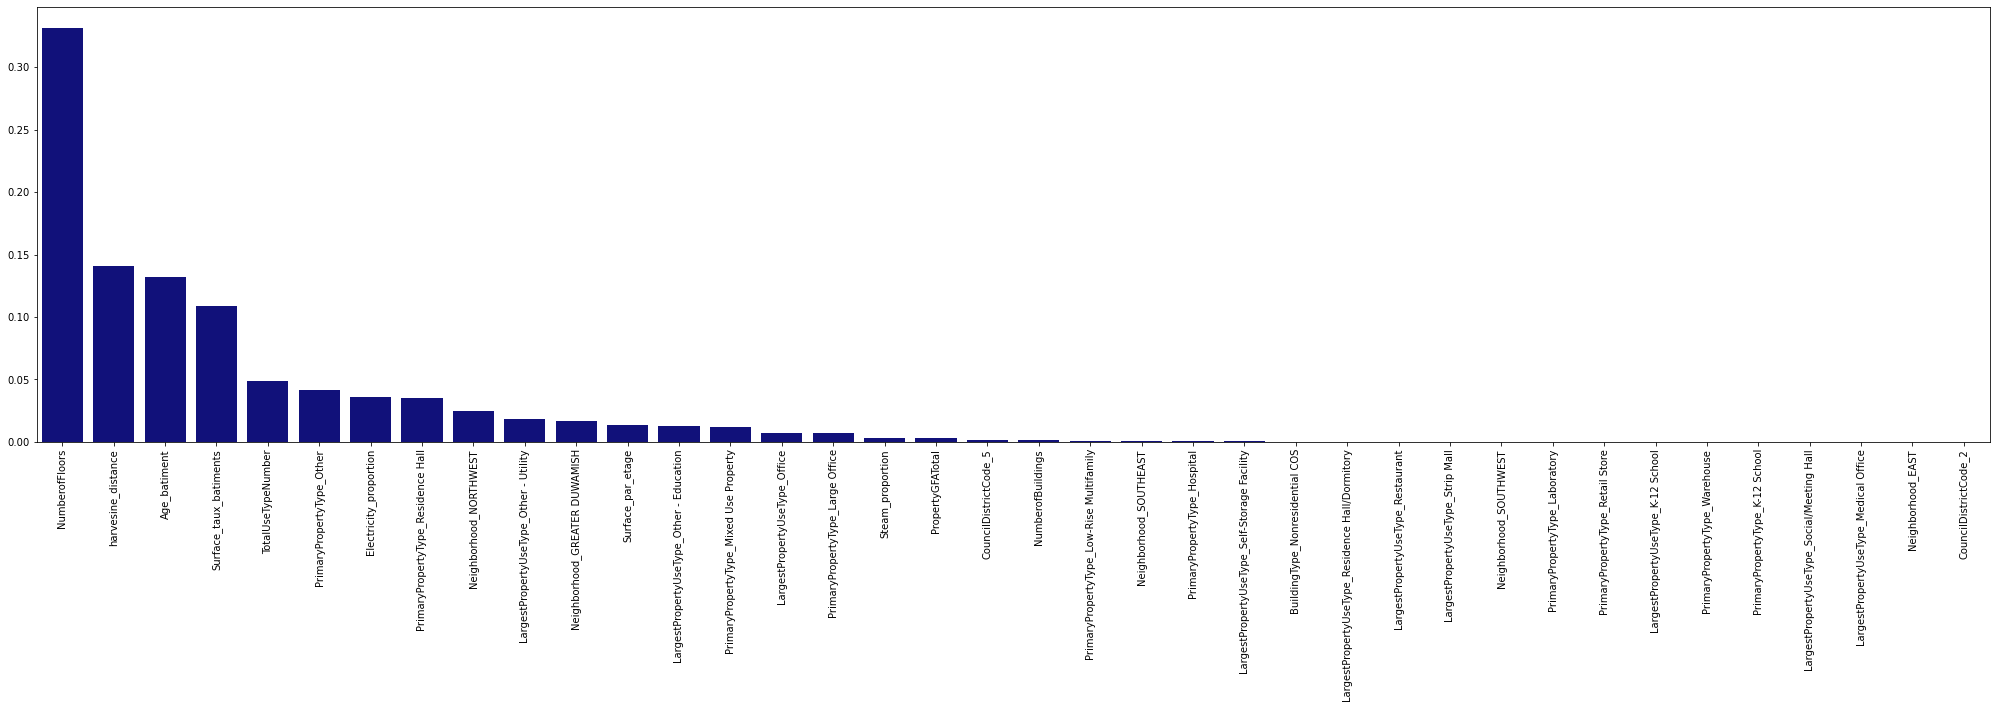

In [38]:
plt.rcParams["figure.figsize"] = (35,8)

importance_conso = pd.Series(model_RF_select_conso_tuned.feature_importances_,index=data_train_filtred_conso.columns)
sns.barplot(x=importance_conso.index,y=importance_conso.sort_values(ascending = False),color='darkblue')
_=plt.xticks(rotation=90)

### XGBoost

### Cas des émissions de CO2

In [39]:
import xgboost as xgb

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [40]:
# Déclaration du modèle
xgbr = xgb.XGBRegressor(verbosity=0) 

# Entrainement du modèle
xgbr.fit(data_train, target_emmi_train.values.ravel())

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [123]:
# Calcul des métrics sur les données d'entrainement
predictions_emmi_XGBoost_train = xgbr.predict(data_train)

print('r2 :', r2_score(target_emmi_train,predictions_emmi_XGBoost_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_train)))

bilan_emmi.append(['XGBoost' , 'Train','MAE', metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_train)])
bilan_emmi.append(['XGBoost' , 'Train','RMSE', metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_train)])
bilan_emmi.append(['XGBoost' , 'Train', 'R2', r2_score(target_emmi_train,predictions_emmi_XGBoost_train)])

r2 : 0.9996601651155727
RMSE : 128.80
MAE : 7.94


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [124]:
# Calcul des metrics sur le jeu de test
predictions_emmi_XGBoost_test = xgbr.predict(data_test)

print('r2 :', r2_score(target_emmi_test,predictions_emmi_XGBoost_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_test)))

bilan_emmi.append(['XGBoost' , 'Test','MAE', metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_test)])
bilan_emmi.append(['XGBoost' , 'Test','RMSE', metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_test)])
bilan_emmi.append(['XGBoost' , 'Test', 'R2', r2_score(target_emmi_test,predictions_emmi_XGBoost_test)])

r2 : 0.6573456859704788
RMSE : 33031.37
MAE : 72.98


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Hyperparamétrisation

In [ ]:
model_XGB_emmi_tuned = xgb.XGBRegressor(verbosity=0) 

param_xgb = {'m__learning_rate' : [0.1, 0.2, 0,3],
             'm__gamma': [0.25, 0.5, 1.0],
             'm__max_depth': [5,10,15,20],
             'm__min_child_weight' : [3.0,4,5],
             'm__n_estimators': [25, 50]}

search = GridSearchCV(model_XGB_emmi_tuned,
                           param_grid=param_xgb,
                            cv=3,
                            scoring=('neg_mean_absolute_error'),
                            return_train_score = True)

result = search.fit(data_train, target_emmi_train.values.ravel())
print('Best Hyperparameters: %s' % result.best_params_)

In [44]:
# Metrics sur les données d'entrainement
model_XGB_emmi_tuned = xgb.XGBRegressor(verbosity=0,learning_rate=0.1,gamma=0.25,max_depth=5,min_child_weight=3,n_estimators=25)
model_XGB_emmi_tuned.fit(data_train, target_emmi_train.values.ravel())
                      
predictions_emmi_XGBoost_tuned_train = model_XGB_emmi_tuned.predict(data_train)

print('r2 :', r2_score(target_emmi_train,predictions_emmi_XGBoost_tuned_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_tuned_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_tuned_train)))

r2 : 0.9411803784505459
RMSE : 22293.26
MAE : 59.06


In [45]:
# Metrics sur les données de test                      
predictions_emmi_XGBoost_tuned_test = model_XGB_emmi_tuned.predict(data_test)

print('r2 :', r2_score(target_emmi_test,predictions_emmi_XGBoost_tuned_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test)))

r2 : 0.6239655416781986
RMSE : 36249.17
MAE : 77.14


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [125]:
# Ecriture des résultats
bilan_emmi.append(['XGBoost - tuned' , 'Train','MAE', metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_tuned_train)])
bilan_emmi.append(['XGBoost - tuned' , 'Train','RMSE', metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_tuned_train)])
bilan_emmi.append(['XGBoost - tuned' , 'Train', 'R2', r2_score(target_emmi_train,predictions_emmi_XGBoost_tuned_train)])

bilan_emmi.append(['XGBoost - tuned' ,  'Test','MAE', format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test))])
bilan_emmi.append(['XGBoost - tuned' ,  'Test','RMSE', format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test))])
bilan_emmi.append(['XGBoost - tuned' ,  'Test','R2', r2_score(target_emmi_test,predictions_emmi_XGBoost_tuned_test)])

### Influence du nombre d'estimateurs

In [ ]:
MAE_train= []
MAE_test=[]

for estimat in range(10,300,10):
    model = xgb.XGBRegressor(verbosity=0,learning_rate=0.1,gamma=0.25,max_depth=5,min_child_weight=3,n_estimators=estimat)
    model.fit(data_train, target_emmi_train.values.ravel())
                      
    predictions_emmi_XGBoost_tuned_infl_train = model.predict(data_train)
    MAE_train.append([estimat,metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_tuned_infl_train)])
    predictions_emmi_XGBoost_tuned_infl_test = model.predict(data_test)
    MAE_test.append([estimat,metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_tuned_infl_test)])               

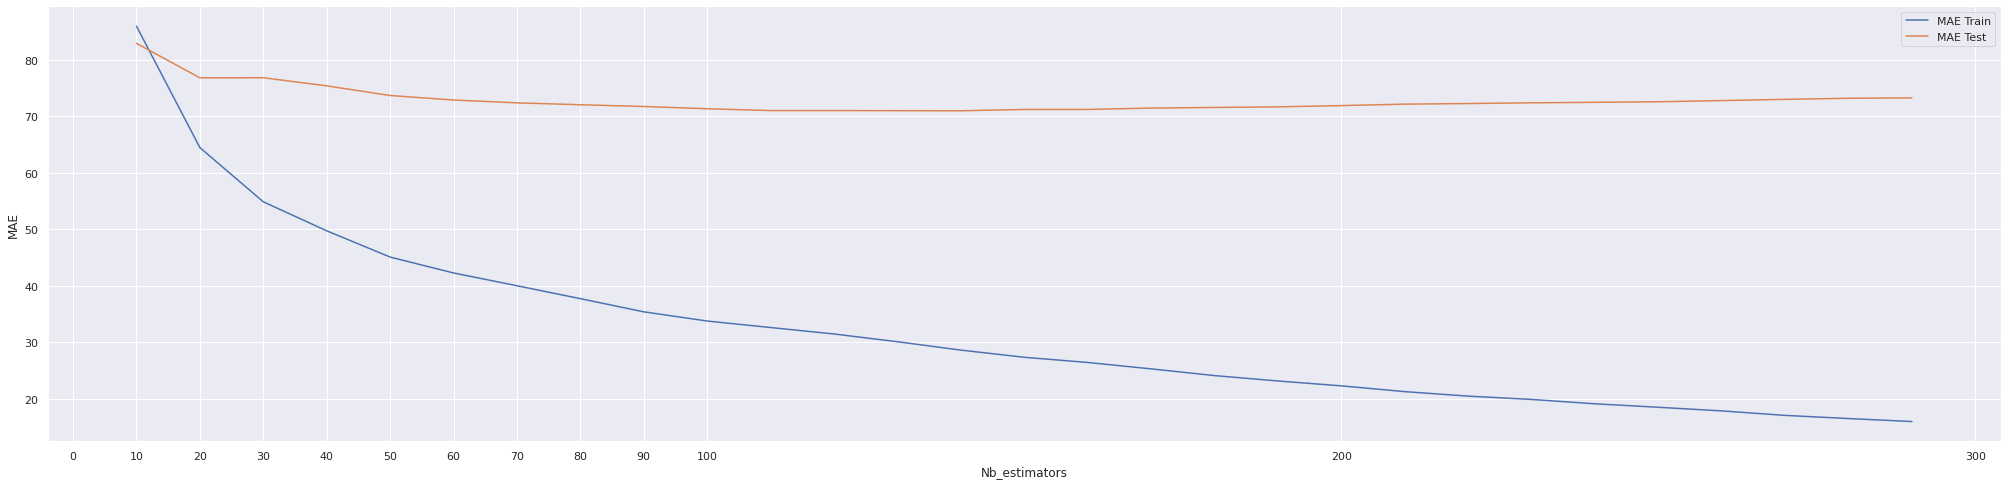

In [48]:
df1 = pd.DataFrame(MAE_train,columns=('Nb_estimators','MAE Train'))
df2 = pd.DataFrame(MAE_test,columns=('Nb_estimators','MAE Test'))       
    
sns.set()
sns.lineplot(x=df1['Nb_estimators'],y=df1['MAE Train'], linestyle="-") 
sns.lineplot(x=df2['Nb_estimators'],y=df2['MAE Test'], linestyle="-",)
_=plt.ylabel('MAE')
_=plt.legend(labels=["MAE Train","MAE Test"])
_=plt.xticks([0,10,20,30,40,50,60,70,80,90,100,200, 300])

## Cas des consommations

In [50]:
# Déclaration du modèle
xgbr_conso = xgb.XGBRegressor(verbosity=0) 

# Entrainement du modèle
xgbr_conso.fit(data_train, target_conso_train.values.ravel())

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [51]:
# Calcul des métrics sur les données d'entrainement
predictions_conso_XGBoost_train = xgbr_conso.predict(data_train)

print('r2 :', r2_score(target_conso_train,predictions_conso_XGBoost_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_train)))

r2 : 0.9993493471428606
RMSE : 266495985238.26
MAE : 368166.66


In [52]:
# Calcul des metrics sur le jeu de test
predictions_conso_XGBoost_test = xgbr_conso.predict(data_test)

print('r2 :', r2_score(target_conso_test,predictions_conso_XGBoost_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_test)))

r2 : 0.6432664816858209
RMSE : 54903015179093.73
MAE : 3401178.82


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [126]:
# Ecriture des résultats
bilan_conso.append(['XGBoost' , 'Train','MAE', metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_train)])
bilan_conso.append(['XGBoost' , 'Train','RMSE', metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_train)])
bilan_conso.append(['XGBoost' , 'Train', 'R2', r2_score(target_conso_train,predictions_conso_XGBoost_train)])

bilan_conso.append(['XGBoost' , 'Test','MAE', metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_test)])
bilan_conso.append(['XGBoost' , 'Test','RMSE', metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_test)])
bilan_conso.append(['XGBoost' , 'Test', 'R2', r2_score(target_conso_test,predictions_conso_XGBoost_test)])

### Hyperpamétrisation

In [ ]:
model_XGB_conso_tuned = xgb.XGBRegressor(verbosity=0)

param_xgb = {'m__learning_rate' : [0.01,0.1, 0.2, 0,3],
             'm__gamma': [0.25, 0.5, 1.0],
             'm__max_depth': [5,10,15,20],
             'm__min_child_weight' : [3.0,4,5],
             'm__n_estimators': [25, 50,100]}

search = GridSearchCV(model_XGB_conso_tuned,
                           param_grid=param_xgb,
                            cv=3,
                            scoring=('neg_mean_absolute_error'),
                            return_train_score = True)              #n_job=-1 supp

result = search.fit(data_train, target_conso_train.values.ravel())
print('Best Hyperparameters: %s' % result.best_params_)

In [116]:
# Entrainement du modèle optimisé
model_XGB_conso_tuned = xgb.XGBRegressor(verbosity=0,learning_rate=0.05,gamma=0.25,max_depth=6,min_child_weight=2,n_estimators=200)
model_XGB_conso_tuned.fit(data_train, target_conso_train.values.ravel())
                      
# Metrics sur les données d'entrainement
predictions_conso_XGBoost_tuned_train = model_XGB_conso_tuned.predict(data_train)

print('r2 :', r2_score(target_conso_train,predictions_conso_XGBoost_tuned_train))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_tuned_train)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_tuned_train)))

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2 : 0.9907973223604808
RMSE : 3769255168041.75
MAE : 1175654.22


In [117]:
# Metrics sur les données de test                      
predictions_conso_XGBoost_tuned_test = model_XGB_conso_tuned.predict(data_test)

print('r2 :', r2_score(target_conso_test,predictions_conso_XGBoost_tuned_test))
print("RMSE : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_tuned_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_tuned_test)))

r2 : 0.6087495474285028
RMSE : 60215338434898.05
MAE : 3404633.49


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [127]:
# Ecriture des résultats
bilan_conso.append(['XGBoost - tuned' , 'Train','MAE', metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_tuned_train)])
bilan_conso.append(['XGBoost - tuned' , 'Train','RMSE', metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_tuned_train)])
bilan_conso.append(['XGBoost - tuned' , 'Train', 'R2', r2_score(target_conso_train,predictions_conso_XGBoost_tuned_train)])

bilan_conso.append(['XGBoost - tuned' ,  'Test','MAE', format(metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_tuned_test))])
bilan_conso.append(['XGBoost - tuned' ,  'Test','RMSE', format(metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_tuned_test))])
bilan_conso.append(['XGBoost - tuned' ,  'Test','R2', r2_score(target_conso_test,predictions_conso_XGBoost_tuned_test)])

## Bilan modèles non linéaires

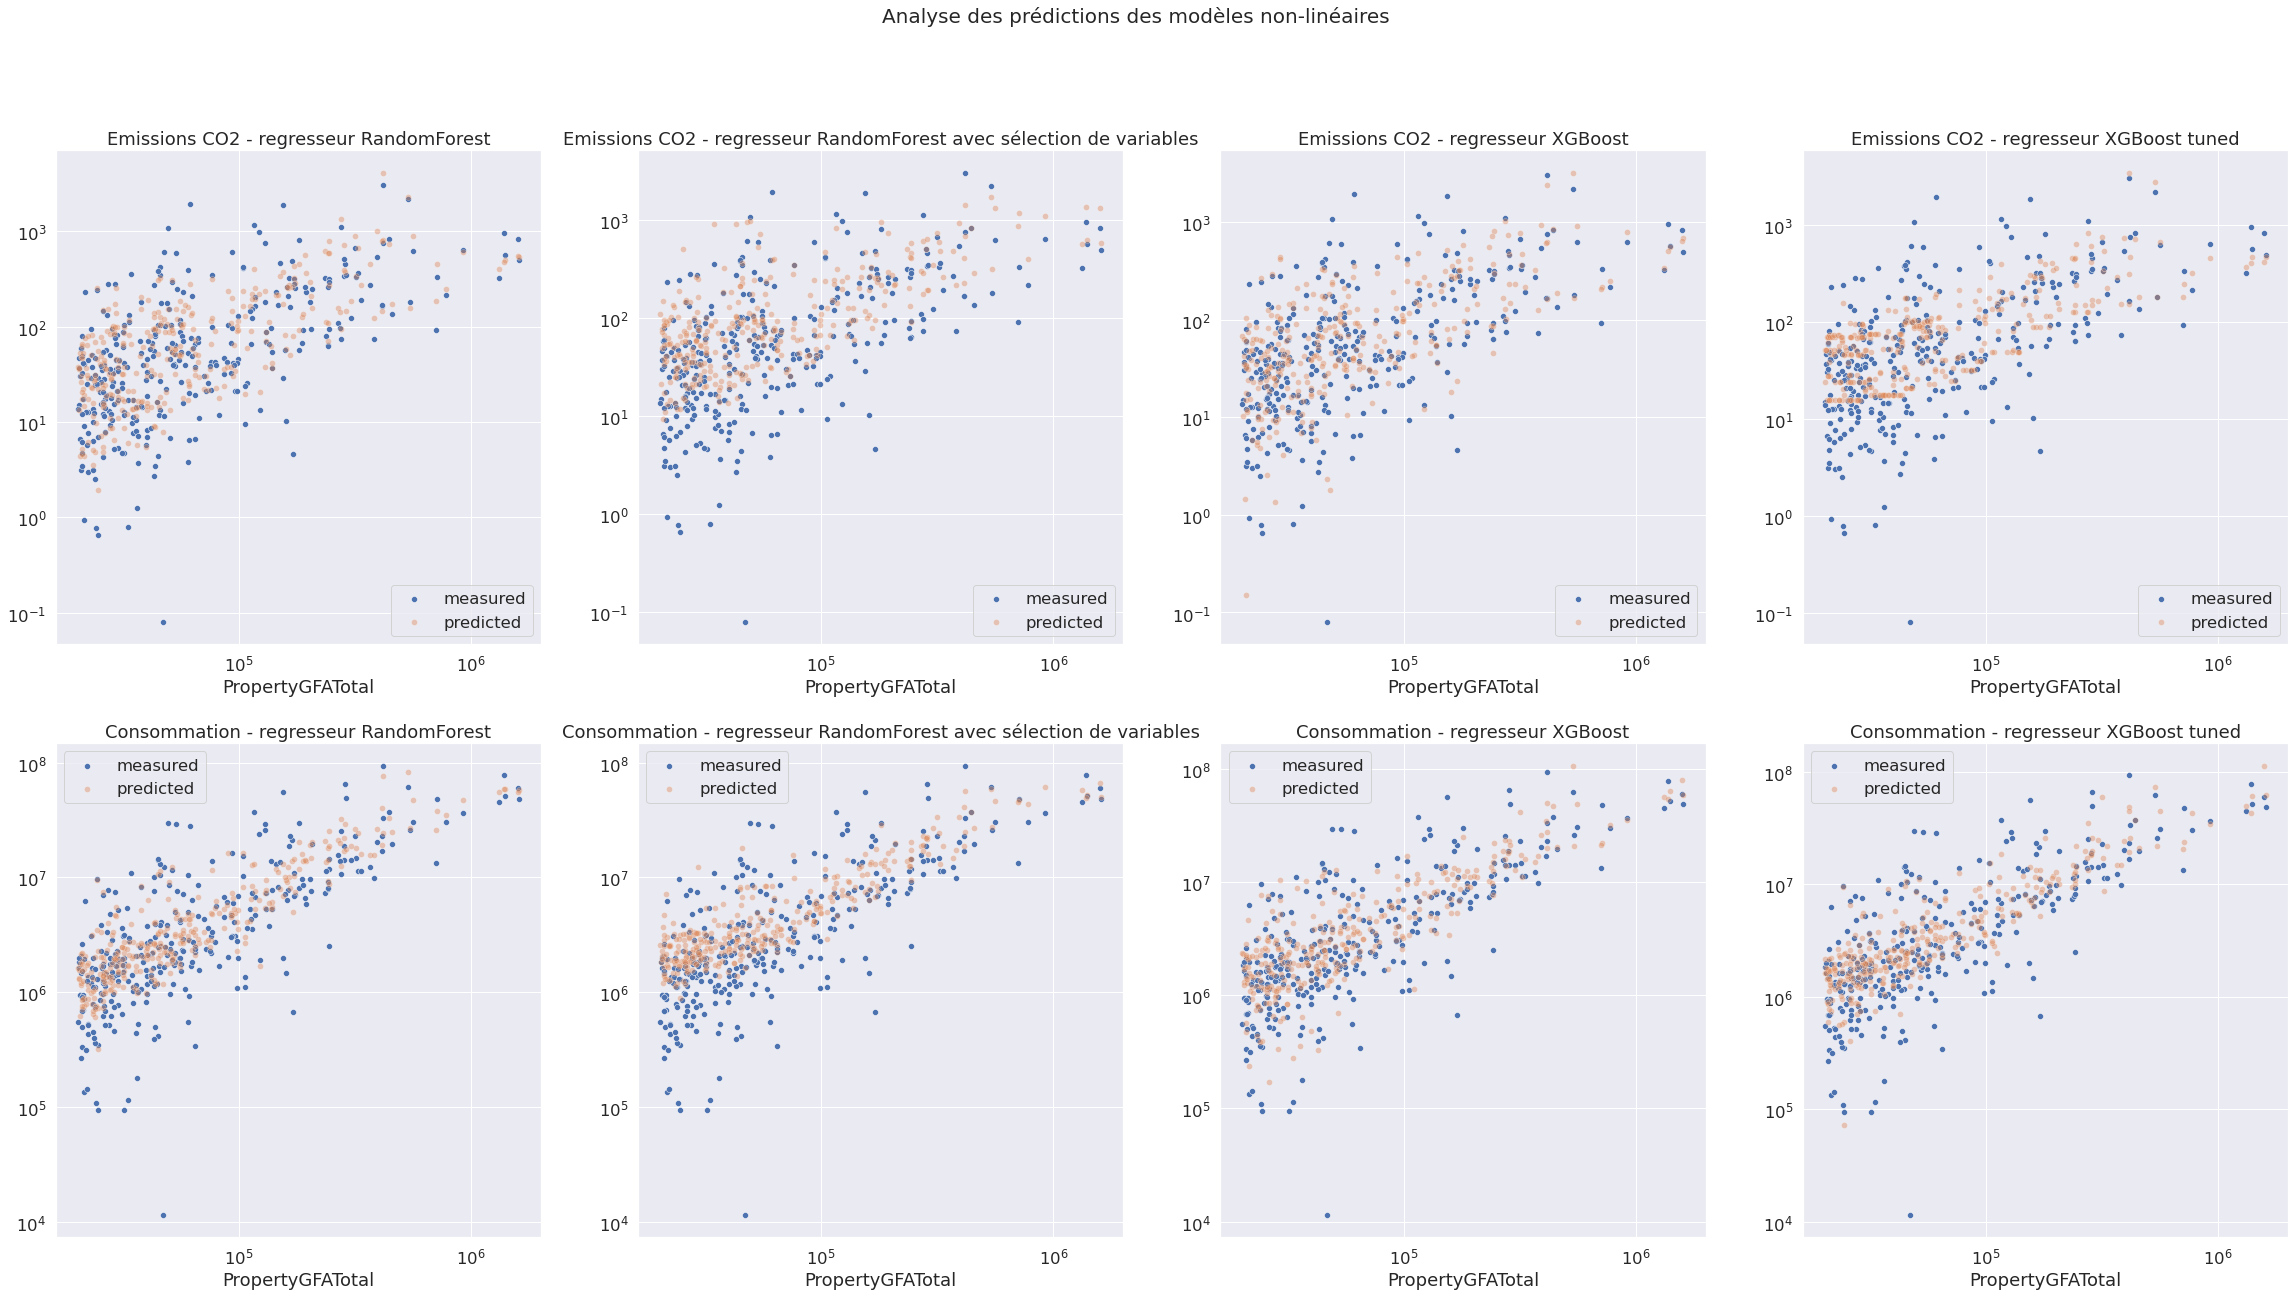

In [128]:
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(2,4)
plt.rcParams["figure.figsize"] = (40,20)


# Plot RF baseline
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_baseline_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,0])

sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_baseline_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,0])

# Plot RF - feature select
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,1])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_feature_select_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,1])

sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,1])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_select_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,1])

# Plot XGBoost baseline
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,2])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_XGBoost_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,2])

sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,2])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_XGBoost_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,2])

# Plot XGBoost - tuned
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0,3])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_XGBoost_tuned_test.ravel(), label='predicted', alpha=0.4,ax = axes[0,3])

sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[1,3])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_XGBoost_tuned_test.ravel(), label='predicted', alpha=0.4,ax = axes[1,3])



# Mise en place des titres et de l'échelle des axes
axes[0,0].set_title('Emissions CO2 - regresseur RandomForest')
axes[1,0].set_title('Consommation - regresseur RandomForest')
axes[0,1].set_title('Emissions CO2 - regresseur RandomForest avec sélection de variables')
axes[1,1].set_title('Consommation - regresseur RandomForest avec sélection de variables')
axes[0,2].set_title('Emissions CO2 - regresseur XGBoost')
axes[1,2].set_title('Consommation - regresseur XGBoost')
axes[0,3].set_title('Emissions CO2 - regresseur XGBoost tuned')
axes[1,3].set_title('Consommation - regresseur XGBoost tuned')


plt.suptitle('Analyse des prédictions des modèles non-linéaires',fontsize=20)

for i in range(2):
    for j in range(4):
        axes[i,j].set_yscale('log')
        axes[i,j].set_xscale('log')

In [129]:
# Affichage des scores - Consommation
bilan_conso =pd.DataFrame(bilan_conso)
bilan_conso[3]=pd.to_numeric(bilan_conso[3])
# bilan_conso[3] = bilan_conso[3].apply('{0:.2f}'.format)
bilan_conso.pivot(index=[1,2],columns=[0]).sort_values([1],ascending=False)

3                                                  
0          RF - baseline RF - feature select       XGBoost XGBoost - tuned
1     2                                                                   
Train MAE   1.385781e+06        2.473288e+06  3.681667e+05    1.175654e+06
      R2    9.365169e-01        8.540766e-01  9.993493e-01    9.907973e-01
      RMSE  2.600157e+13        5.976768e+13  2.664960e+11    3.769255e+12
Test  MAE   3.281594e+06        3.683320e+06  3.401179e+06    3.404633e+06
      R2    7.211168e-01        6.634534e-01  6.432665e-01    6.087495e-01
      RMSE  4.292148e+13        5.179616e+13  5.490302e+13    6.021534e+13

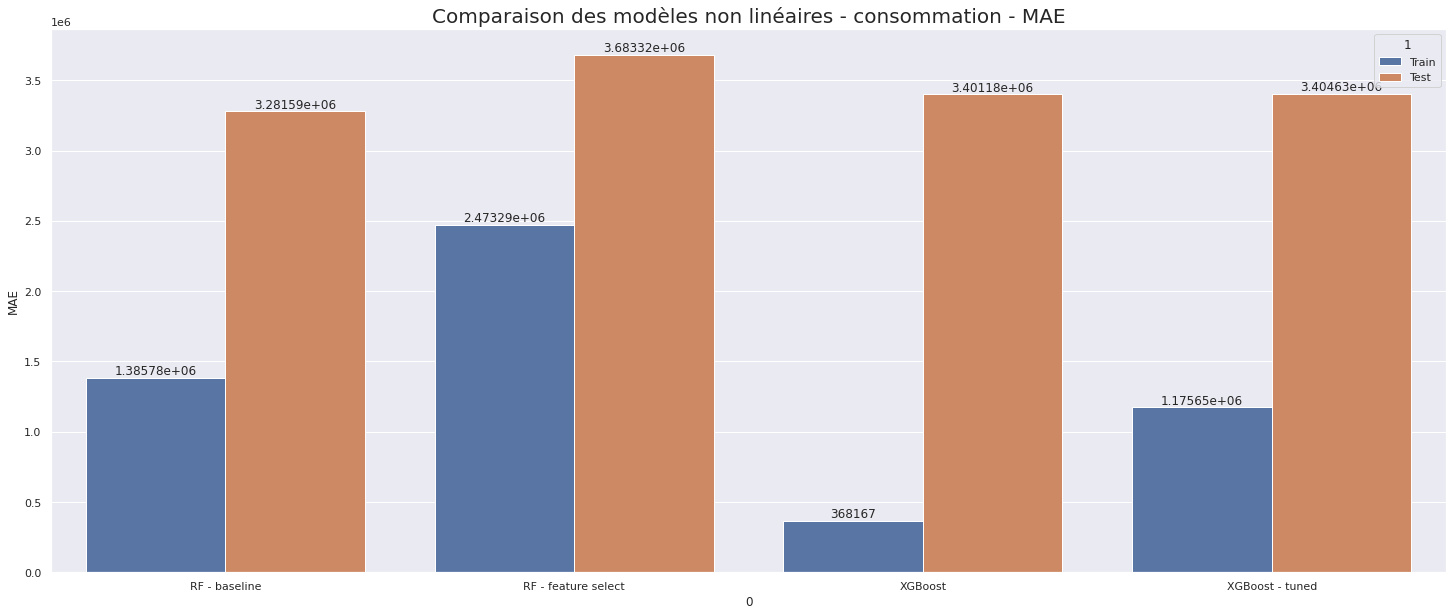

In [130]:
bilan_conso_MAE = bilan_conso[bilan_conso[2]=='MAE']

sns.set()
plt.rcParams["figure.figsize"] = (25,10)
ax = sns.barplot(x=bilan_conso_MAE[0],y=abs(bilan_conso_MAE[3]),hue=bilan_conso_MAE[1],data=bilan_conso_MAE)
_=ax.set_ylabel('MAE')
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Comparaison des modèles non linéaires - consommation - MAE', fontsize=20)

In [131]:
# Affichage des scores - Emmissions
bilan_emmi =pd.DataFrame(bilan_emmi)
bilan_emmi[3]=pd.to_numeric(bilan_emmi[3])
bilan_emmi.pivot(index=0,columns=[2,1]).sort_values([(3,  'MAE',  'Test')],ascending=True)

3                                     \
2                          MAE          RMSE        R2        MAE   
1                        Train         Train     Train       Test   
0                                                                   
XGBoost               7.940709    128.801024  0.999660  72.977455   
RF - baseline        30.731289  11981.022102  0.968389  76.554969   
XGBoost - tuned      59.063009  22293.260075  0.941180  77.138763   
RF - feature select  70.769527  78639.837306  0.792513  95.455649   

                                             
2                            RMSE        R2  
1                            Test      Test  
0                                            
XGBoost              33031.374870  0.657346  
RF - baseline        37762.964357  0.608262  
XGBoost - tuned      36249.171974  0.623966  
RF - feature select  45198.673523  0.531127

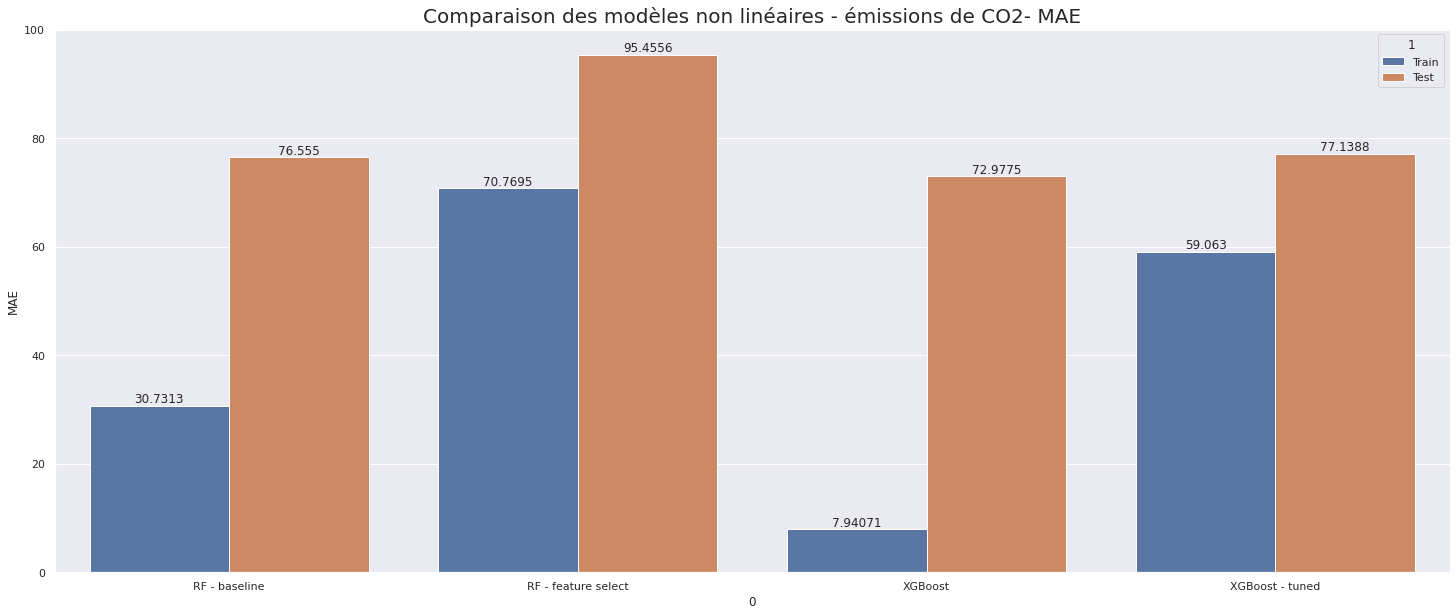

In [132]:
bilan_emmi_MAE = bilan_emmi[bilan_emmi[2]=='MAE']

sns.set()
plt.rcParams["figure.figsize"] = (25,10)
ax = sns.barplot(x=bilan_emmi_MAE[0],y=abs(bilan_emmi_MAE[3]),hue=bilan_emmi_MAE[1],data=bilan_emmi_MAE)
_=ax.set_ylabel('MAE')
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Comparaison des modèles non linéaires - émissions de CO2- MAE', fontsize=20)

# Conclusion  
Sur notre meilleur modèle, nous allons regarder l'influence de l'EnergyStarScore sur les résultats.  
Nous regarderons également le comportement du modèle sur les années futures : 2017-2019 et 2020 en ne conservant que les nouveaux bâtiments.  

## Influence de l'EnergyStarScore

In [133]:
energystar_score_2015_train = pd.read_csv("energystar_score_2015_train.csv")
energystar_score_2015_test = pd.read_csv("energystar_score_2015_test.csv")

data_train_NRJ = pd.concat([energystar_score_2015_train,data_train],axis=1)
data_test_NRJ = pd.concat([energystar_score_2015_test,data_test],axis=1)

### Cas des émissions de CO2

In [134]:
# Metrics sur les émissions de CO2
model = xgb.XGBRegressor(verbosity=0,learning_rate=0.01,gamma=0.25,max_depth=10,min_child_weight=3,n_estimators=500)
model.fit(data_train_NRJ, target_emmi_train.values.ravel())
                      
predictions_emmi_XGBoost_NRJ_train = model.predict(data_train_NRJ)

print('r2 - train :', r2_score(target_emmi_train,predictions_emmi_XGBoost_NRJ_train))
print("RMSE - train : {:.2f}".format(metrics.mean_squared_error(target_emmi_train, predictions_emmi_XGBoost_NRJ_train)))
print("MAE - train : {:.2f}".format(metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_NRJ_train)))                      

predictions_emmi_XGBoost_NRJ_test = model.predict(data_test_NRJ)

print('r2 - test :', r2_score(target_emmi_test,predictions_emmi_XGBoost_NRJ_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_emmi_test, predictions_emmi_XGBoost_NRJ_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_NRJ_test)))

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2 - train : 0.991560253035036
RMSE - train : 3198.75
MAE - train : 18.75
r2 - test : 0.6316838678421552
RMSE - test : 35505.14
MAE - test : 68.57


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [135]:
compare_NRJ_emmi = bilan_emmi_MAE[bilan_emmi_MAE[0]=='XGBoost']
compare_NRJ_emmi = compare_NRJ_emmi.append([['XGBoost_av_EnergyStarScore','Train','MAE',metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_NRJ_train)]])
compare_NRJ_emmi = compare_NRJ_emmi.append([['XGBoost_av_EnergyStarScore','Test','MAE',metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_NRJ_test)]])

/tmp/ipykernel_56445/1450532975.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_NRJ_emmi = compare_NRJ_emmi.append([['XGBoost_av_EnergyStarScore','Train','MAE',metrics.mean_absolute_error(target_emmi_train, predictions_emmi_XGBoost_NRJ_train)]])
/tmp/ipykernel_56445/1450532975.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_NRJ_emmi = compare_NRJ_emmi.append([['XGBoost_av_EnergyStarScore','Test','MAE',metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_NRJ_test)]])


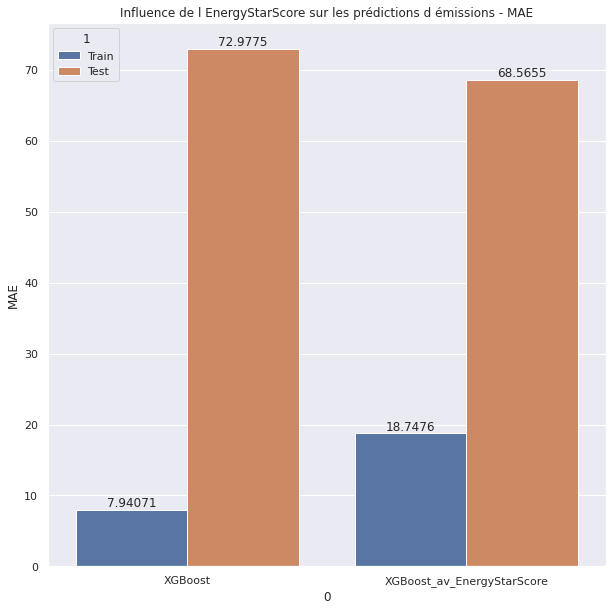

In [136]:
plt.rcParams["figure.figsize"] = (10,10)
sns.set()

ax = sns.barplot(x=compare_NRJ_emmi[0],y=abs(compare_NRJ_emmi[3]),hue=compare_NRJ_emmi[1],data=compare_NRJ_emmi)
_=ax.set_ylabel('MAE')
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Influence de l EnergyStarScore sur les prédictions d émissions - MAE')

### Cas de la consommation

In [137]:
# Metrics sur la consommation
model = xgb.XGBRegressor(verbosity=0,learning_rate=0.01,gamma=0.25,max_depth=10,min_child_weight=3,n_estimators=500)
model.fit(data_train_NRJ, target_conso_train.values.ravel())
                      
predictions_conso_XGBoost_NRJ_train = model.predict(data_train_NRJ)

print('r2 - train :', r2_score(target_conso_train,predictions_conso_XGBoost_NRJ_train))
print("RMSE - train : {:.2f}".format(metrics.mean_squared_error(target_conso_train, predictions_conso_XGBoost_NRJ_train)))
print("MAE - train : {:.2f}".format(metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_NRJ_train)))
                      

predictions_conso_XGBoost_NRJ_test = model.predict(data_test_NRJ)

print('r2 - test :', r2_score(target_conso_test,predictions_conso_XGBoost_NRJ_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_test, predictions_conso_XGBoost_NRJ_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_NRJ_test)))

/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


r2 - train : 0.9824902238663002
RMSE - train : 7171696843947.05
MAE - train : 863271.73
r2 - test : 0.5224305605280785
RMSE - test : 73500248331882.14
MAE - test : 3382840.82


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [138]:
compare_NRJ_conso = bilan_conso_MAE[bilan_conso_MAE[0]=='XGBoost']
compare_NRJ_conso = compare_NRJ_conso.append([['XGBoost_av_EnergyStarScore','Train','MAE',metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_NRJ_train)]])
compare_NRJ_conso = compare_NRJ_conso.append([['XGBoost_av_EnergyStarScore','Test','MAE',metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_NRJ_test)]])

/tmp/ipykernel_56445/3890852113.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_NRJ_conso = compare_NRJ_conso.append([['XGBoost_av_EnergyStarScore','Train','MAE',metrics.mean_absolute_error(target_conso_train, predictions_conso_XGBoost_NRJ_train)]])
/tmp/ipykernel_56445/3890852113.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_NRJ_conso = compare_NRJ_conso.append([['XGBoost_av_EnergyStarScore','Test','MAE',metrics.mean_absolute_error(target_conso_test, predictions_conso_XGBoost_NRJ_test)]])


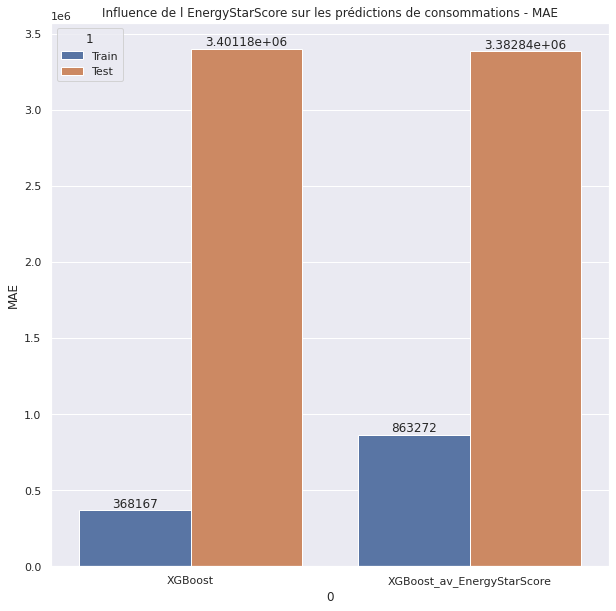

In [139]:


sns.set()
plt.rcParams["figure.figsize"] = (10,10)

ax = sns.barplot(x=compare_NRJ_conso[0],y=abs(compare_NRJ_conso[3]),hue=compare_NRJ_conso[1],data=compare_NRJ_conso)
for container in ax.containers:
    ax.bar_label(container)
_ = ax.set_title('Influence de l EnergyStarScore sur les prédictions de consommations - MAE')
_=ax.set_ylabel('MAE')

On observe qu'aussi bien sur les consommations que sur les émissions, la prise en compte de l'EnergyStarScore améliore légèrement les performances.  
Néanmoins, cette variable est encore peu renseignée, il est donc difficile de savoir si ca prise en compte est réellement significative.  

## Test du meilleur modèle sur des batiments jamais rencontrés

In [140]:
# Importation des années futures
data_encoded_2016_temp = data_encoded_2016.drop(['ENERGYSTARScore','TotalGHGEmissions','SiteEnergyUse'],axis=1)
data_encoded_futur_temp = data_encoded_futur.drop(['ENERGYSTARScore','TotalGHGEmissions','SiteEnergyUse'],axis=1)
target_conso_futur_test = data_encoded_futur[['SiteEnergyUse']]
target_emmi_futur_test = data_encoded_futur[['TotalGHGEmissions']]

In [142]:
# Déclaration du jeu de test des années futures
# data_test_futur = data_encoded_futur.drop(['SiteEnergyUse','TotalGHGEmissions'],axis=1)
# target_conso_futur_test = data_encoded_futur[['SiteEnergyUse']]
# target_emmi_futur_test = data_encoded_futur[['TotalGHGEmissions']]

# Ajout des colonnes manquantes dans le df_futur - En effet, vu que toutes les modalités oneHotEncodées ne sont pas présentes dans les années futures, nécessicité de créer ces colonnes
new_features = data_train.columns.difference(data_encoded_futur_temp.columns)
for n in new_features:
    data_test_futur[n] = 0

### Cas des émissions de CO2

In [143]:
# Metrics sur 2016
predictions_emmi_XGBoost_2016_test = model_XGB_emmi_tuned.predict(data_encoded_2016_temp)

print("RMSE : {:.2f}".format(metrics.mean_squared_error(data_encoded_2016['TotalGHGEmissions'], predictions_emmi_XGBoost_2016_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(data_encoded_2016['TotalGHGEmissions'], predictions_emmi_XGBoost_2016_test)))
print("R2 : {:.2f}".format(r2_score(data_encoded_2016['TotalGHGEmissions'],predictions_emmi_XGBoost_2016_test)))

RMSE : 154404.08
MAE : 78.44
R2 : 0.69


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [144]:
# Metrics sur les batiments jamais rencontrés
predictions_emmi_XGBoost_futur_test = model_XGB_emmi_tuned.predict(data_encoded_futur_temp.drop(['Surface_par_batiment'],axis=1))

print('r2 - test :', r2_score(target_emmi_futur_test,predictions_emmi_XGBoost_futur_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_emmi_futur_test, predictions_emmi_XGBoost_futur_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_emmi_futur_test, predictions_emmi_XGBoost_futur_test)))

r2 - test : 0.2989645067901334
RMSE - test : 1031257.36
MAE - test : 289.75


/home/agent/Logiciels/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


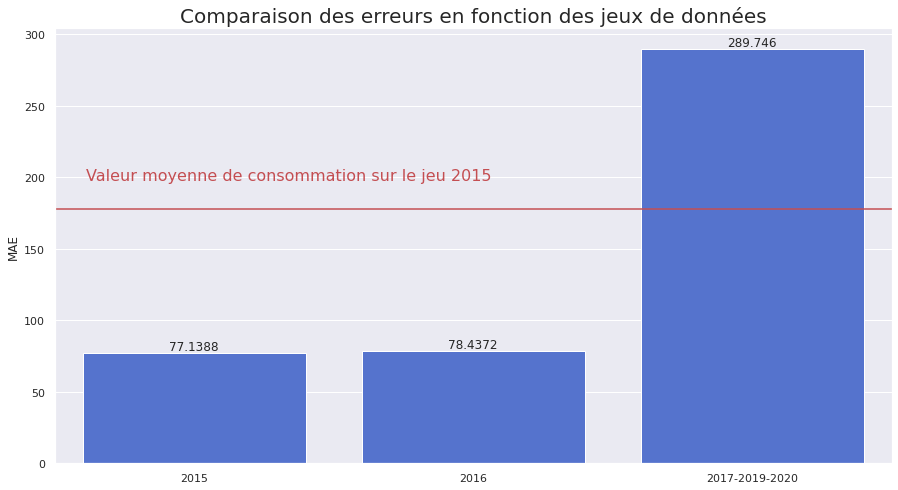

In [145]:
# Comparaison des erreurs de prédictions sur les jeux de données
sns.set()
plt.rcParams["figure.figsize"] = (15,8)
Jeux_de_données = ['2015','2016','2017-2019-2020']
Valeurs = [metrics.mean_absolute_error(target_emmi_test, predictions_emmi_XGBoost_tuned_test),metrics.mean_absolute_error(data_encoded_2016['TotalGHGEmissions'], predictions_emmi_XGBoost_2016_test),metrics.mean_absolute_error(target_emmi_futur_test, predictions_emmi_XGBoost_futur_test)]

ax = sns.barplot(x=Jeux_de_données,y=Valeurs,color='royalblue')
plt.axhline(y=178,color='r')
_=ax.set_ylabel('MAE')

ax.annotate('Valeur moyenne de consommation sur le jeu 2015', xy=(1, 0), xycoords='axes fraction', fontsize=16,
                xytext=(-400, 280), textcoords='offset points',color='r',
                ha='right', va='bottom')

for container in ax.containers:
    ax.bar_label(container)

_ = ax.set_title('Comparaison des erreurs en fonction des jeux de données', fontsize=20)

Text(0.5, 1.0, 'Prédictions années futures')

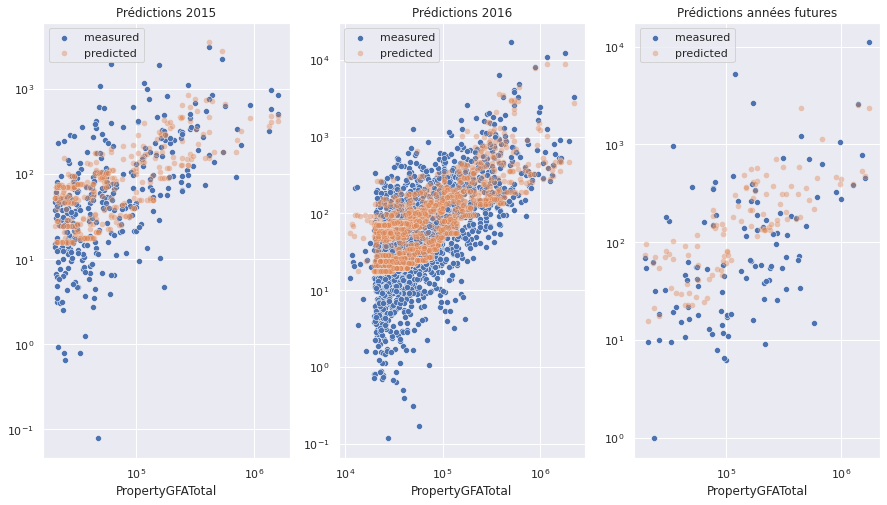

In [146]:
sns.set(font_scale = 1)
fig, axes = plt.subplots(1,3)
plt.rcParams["figure.figsize"] = (25,7)

# Sur le jeu de 2015
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_emmi_test.values.ravel(), label='measured' ,ax = axes[0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_emmi_XGBoost_tuned_test.ravel(), label='predicted', alpha=0.4,ax = axes[0])

# Sur le jeu de 2016
sns.scatterplot(x=data_encoded_2016['PropertyGFATotal'], y=data_encoded_2016['TotalGHGEmissions'].values.ravel(), label='measured' ,ax = axes[1])
sns.scatterplot(x=data_encoded_2016['PropertyGFATotal'], y=predictions_emmi_XGBoost_2016_test.ravel(), label='predicted', alpha=0.4,ax = axes[1])

# Sur les années futures
sns.scatterplot(x=data_encoded_futur['PropertyGFATotal'], y=data_encoded_futur['TotalGHGEmissions'].values.ravel(), label='measured' ,ax = axes[2])
sns.scatterplot(x=data_encoded_futur['PropertyGFATotal'], y=predictions_emmi_XGBoost_futur_test.ravel(), label='predicted', alpha=0.4,ax = axes[2])

for i in range(3):
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    
axes[0].set_title('Prédictions 2015')
axes[1].set_title('Prédictions 2016')
axes[2].set_title('Prédictions années futures')

### Cas de la consommation

In [147]:
# Cas de la consommation
predictions_conso_RF_select_2016_test = model_RF_select_conso_tuned.predict(data_encoded_2016_temp[selected_features_conso])

print("RMSE : {:.2f}".format(metrics.mean_squared_error(data_encoded_2016['SiteEnergyUse'], predictions_conso_RF_select_2016_test)))
print("MAE : {:.2f}".format(metrics.mean_absolute_error(data_encoded_2016['SiteEnergyUse'], predictions_conso_RF_select_2016_test)))
print("R2 : {:.2f}".format(r2_score(data_encoded_2016['SiteEnergyUse'],predictions_conso_RF_select_2016_test)))

RMSE : 173891663438522.53
MAE : 3414158.47
R2 : 0.63


In [149]:
# Cas de la consommation
predictions_conso_RF_select_futur_test = model_RF_select_conso_tuned.predict(data_encoded_futur_temp[selected_features_conso])

print('r2 - test :', r2_score(target_conso_futur_test,predictions_conso_RF_select_futur_test))
print("RMSE - test : {:.2f}".format(metrics.mean_squared_error(target_conso_futur_test, predictions_conso_RF_select_futur_test)))
print("MAE - test : {:.2f}".format(metrics.mean_absolute_error(target_conso_futur_test, predictions_conso_RF_select_futur_test)))

r2 - test : 0.43670051168964297
RMSE - test : 625538516150868.12
MAE - test : 12801583.80


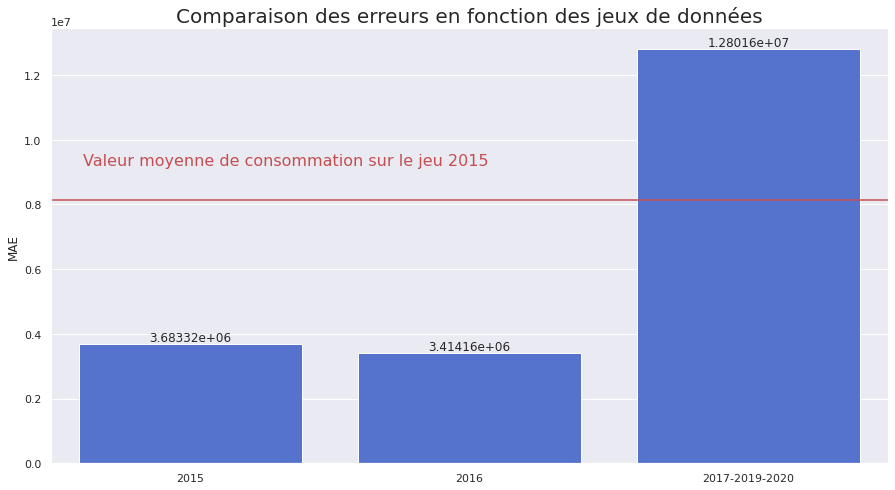

In [150]:
# Comparaison des erreurs de prédictions sur les jeux de données
sns.set()
plt.rcParams["figure.figsize"] = (15,8)
Jeux_de_données = ['2015','2016','2017-2019-2020']
Valeurs = [metrics.mean_absolute_error(target_conso_test, predictions_conso_select_RF_test),metrics.mean_absolute_error(data_encoded_2016['SiteEnergyUse'], predictions_conso_RF_select_2016_test),metrics.mean_absolute_error(target_conso_futur_test, predictions_conso_RF_select_futur_test)]

ax = sns.barplot(x=Jeux_de_données,y=Valeurs,color='royalblue')
plt.axhline(y=8124608,color='r')
_=ax.set_ylabel('MAE')

ax.annotate('Valeur moyenne de consommation sur le jeu 2015', xy=(1, 0), xycoords='axes fraction', fontsize=16,
                xytext=(-400, 295), textcoords='offset points',color='r',
                ha='right', va='bottom')

for container in ax.containers:
    ax.bar_label(container)

_ = ax.set_title('Comparaison des erreurs en fonction des jeux de données', fontsize=20)

### Ecarts de prédictions type de bâtiment sur 2016

In [151]:
BuidingType_2016 = pd.read_csv("BuidingType_2016.csv")
final_df_2016 = pd.concat([data_encoded_2016,pd.DataFrame(predictions_emmi_XGBoost_2016_test,columns=['Prédictions émissions']),
                           pd.DataFrame(predictions_conso_RF_select_2016_test,columns=['Prédictions consommations']),BuidingType_2016,],axis=1)
final_df_2016 = final_df_2016.groupby(by='BuildingType').mean()



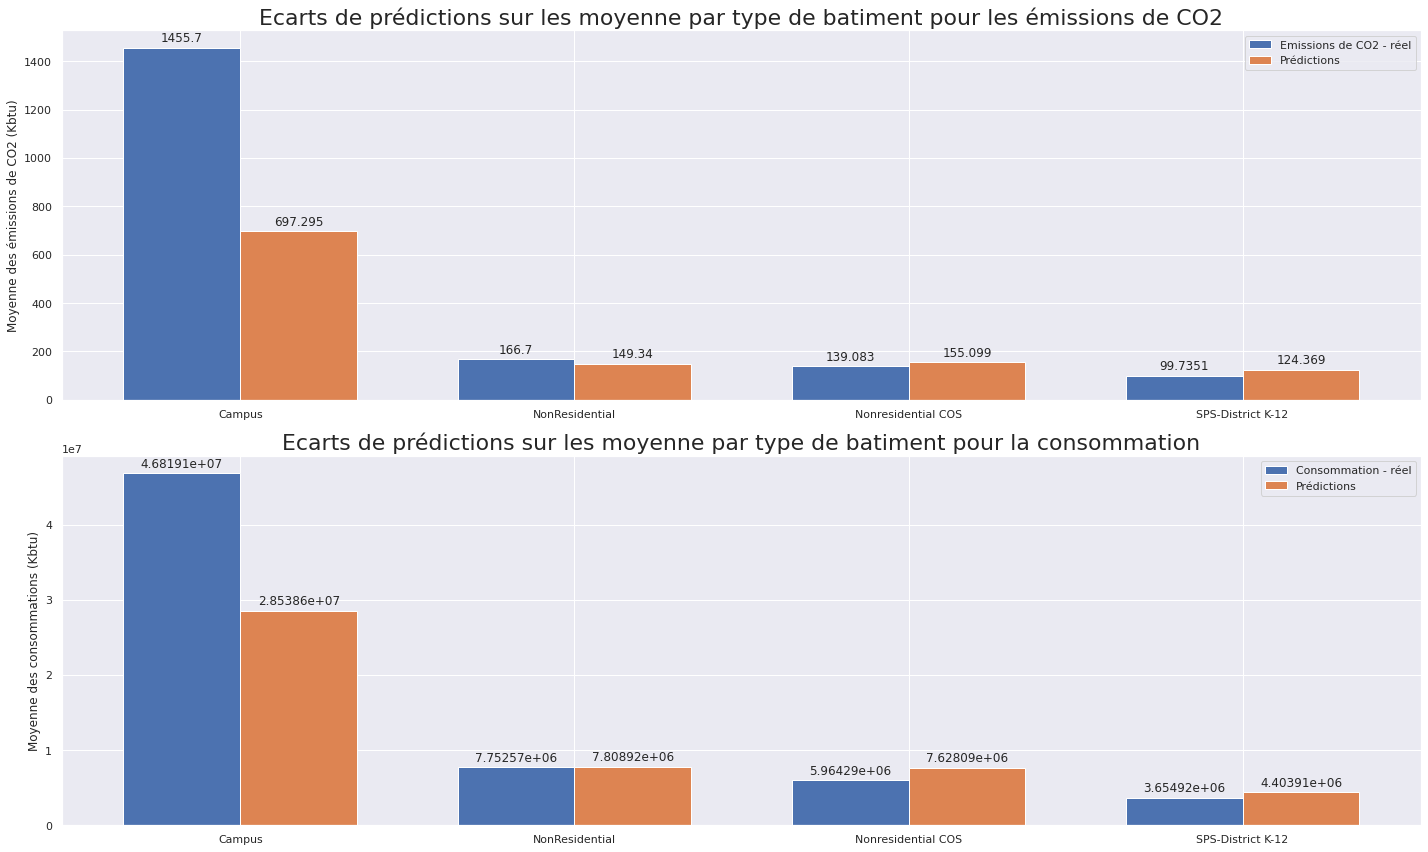

In [152]:
x = np.arange(len(final_df_2016.index))
width = 0.35

fig, ax = plt.subplots(2,figsize=(20,12), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, final_df_2016['TotalGHGEmissions'], width, label='Emissions de CO2 - réel')
scores2 = ax[0].bar(x + width/2, final_df_2016['Prédictions émissions'], width, label='Prédictions')

scores3 = ax[1].bar(x - width/2, final_df_2016['SiteEnergyUse'], width, label='Consommation - réel')
scores4 = ax[1].bar(x + width/2, final_df_2016['Prédictions consommations'], width, label='Prédictions')

ax[0].set_ylabel('Moyenne des émissions de CO2 (Kbtu)')
ax[1].set_ylabel('Moyenne des consommations (Kbtu)')

ax[0].set_title('Ecarts de prédictions sur les moyenne par type de batiment pour les émissions de CO2' ,fontsize=22)
ax[1].set_title('Ecarts de prédictions sur les moyenne par type de batiment pour la consommation' ,fontsize=22)

ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

ax[1].bar_label(scores3, padding=3)
ax[1].bar_label(scores4, padding=3)
    
for i in range (2):
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(final_df_2016.index)
    ax[i].legend()


fig.tight_layout()

Text(0.5, 1.0, 'Prédictions années futures')

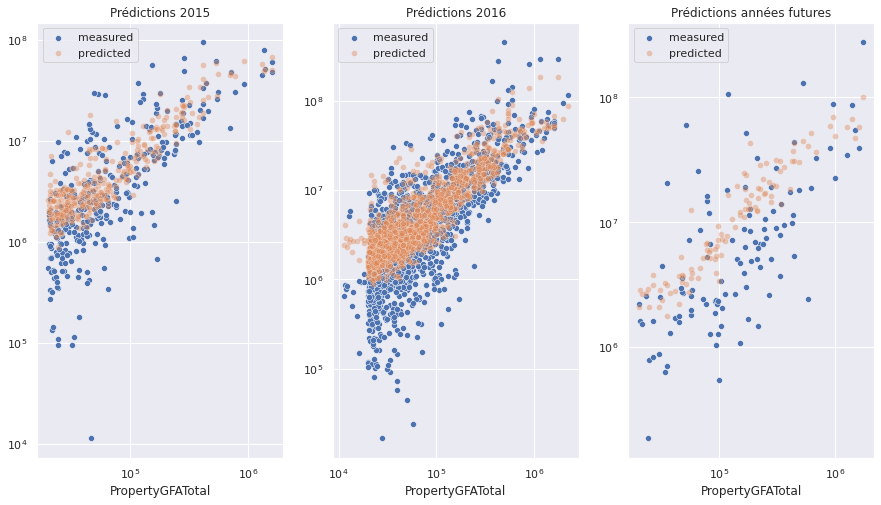

In [153]:
# Plot de toutes les prédictions
sns.set(font_scale = 1)
fig, axes = plt.subplots(1,3)
plt.rcParams["figure.figsize"] = (25,7)

# Sur le jeu de 2015
sns.scatterplot(x=data_test['PropertyGFATotal'], y=target_conso_test.values.ravel(), label='measured' ,ax = axes[0])
sns.scatterplot(x=data_test['PropertyGFATotal'], y=predictions_conso_select_RF_test.ravel(), label='predicted', alpha=0.4,ax = axes[0])

# Sur le jeu de 2016
sns.scatterplot(x=data_encoded_2016['PropertyGFATotal'], y=data_encoded_2016['SiteEnergyUse'].values.ravel(), label='measured' ,ax = axes[1])
sns.scatterplot(x=data_encoded_2016['PropertyGFATotal'], y=predictions_conso_RF_select_2016_test.ravel(), label='predicted', alpha=0.4,ax = axes[1])

# Sur les années futures
sns.scatterplot(x=data_encoded_futur['PropertyGFATotal'], y=data_encoded_futur['SiteEnergyUse'].values.ravel(), label='measured' ,ax = axes[2])
sns.scatterplot(x=data_encoded_futur['PropertyGFATotal'], y=predictions_conso_RF_select_futur_test.ravel(), label='predicted', alpha=0.4,ax = axes[2])

for i in range(3):
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    
axes[0].set_title('Prédictions 2015')
axes[1].set_title('Prédictions 2016')
axes[2].set_title('Prédictions années futures')